# Determine Optimal K for Clustering

In [127]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
import re

data source can be downloaded here: https://www.kaggle.com/datasets/shwetabh123/mall-customers

In [119]:
fp = '/home/lucky/Datasets/Mall_Customers.csv'

In [120]:
df = pd.read_csv(fp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [121]:
col = []
[col.append(re.sub('[^a-zA-Z]','',i.lower())) for i in df.columns]
df.columns = col
df.head()

,customerid,gender,age,annualincomek,spendingscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annualincomek,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spendingscore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


We will use **annualincomek** (annual income in thousands of dollars) and **spendingscore** features to conduct clustering.<br/>
Before conduct clustering, we will find the optimal number of clusters using several approaches.<br/><br/>

### Elbow Curve Method

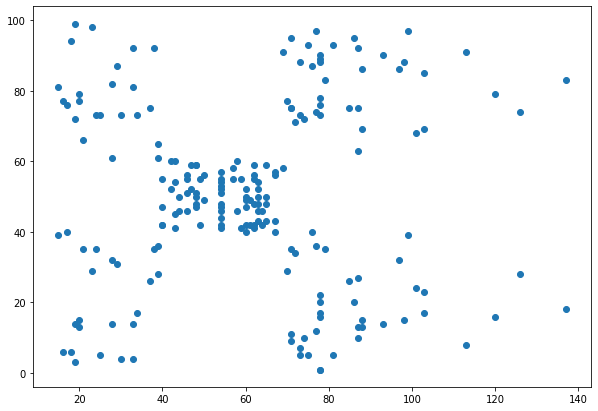

In [123]:
x1 = df.annualincomek.tolist()
x1 = x1[:300]
x2 = df.spendingscore.tolist()
x2 = x2[:300]
plt.figure(figsize=(10,7))
plt.scatter(x1, x2)
plt.show()

Visually we can see the number of clusters should be around 5, but it still does not enough to determine the optimal number of clusters.

In [124]:
df1 = pd.DataFrame(x1, columns=['x1'])
df1['x2'] = x2
df1.head()

,x1,x2
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


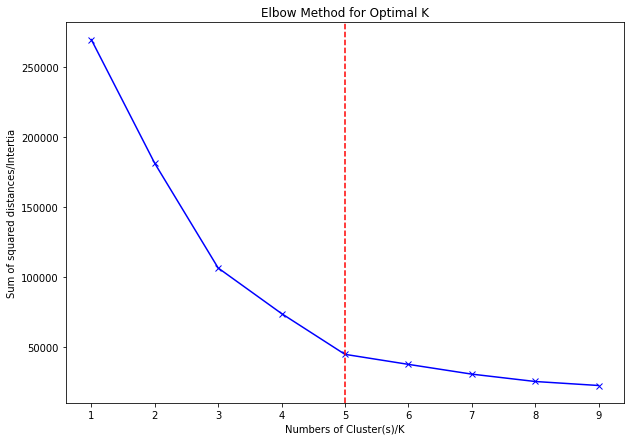

In [125]:
sum_of_squared_distance = []
k = range(1, 10)
for num_clusters in k:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df1)
    sum_of_squared_distance.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(k, sum_of_squared_distance, 'bx-')
plt.axvline(5, linestyle='--', color='red')
plt.xlabel('Numbers of Cluster(s)/K')
plt.ylabel('Sum of squared distances/Intertia')
plt.title('Elbow Method for Optimal K')
plt.show()

The curve above tells us that elbow is at k=5 (the condition where sum of squared distance falls suddenly), it indicates that the optimal k for our datset is 5.

### Silhouette Analysis

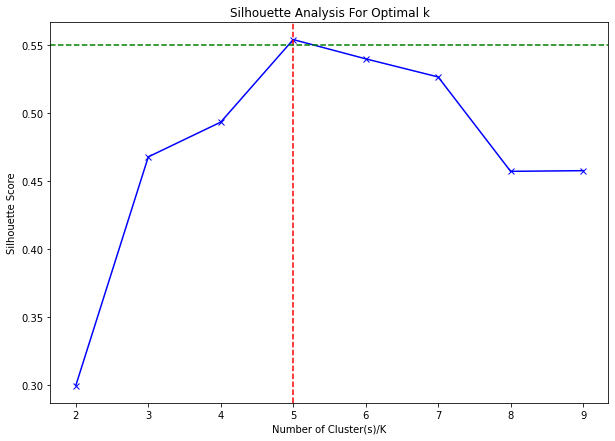

In [126]:
k = range(2,10)
sil = []
for num_clusters in k:
    # initialise kmeans
    kmeans= KMeans(n_clusters=num_clusters)
    kmeans.fit(df1) 
    cluster_labels = kmeans.labels_
    
   # append silhouette score
    sil.append(silhouette_score(df1, cluster_labels))

plt.figure(figsize=(10,7))
plt.plot(k, silhouette_avg, 'bx-')
plt.axvline(5, linestyle='--', color='red')
plt.axhline(.55, linestyle='--', color='green')
plt.xlabel('Number of Cluster(s)/K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Analysis For Optimal k')
plt.show()

Since the highest silhouette score is around 0.55, hence we will choose 5 clusters.

### Dendrogram

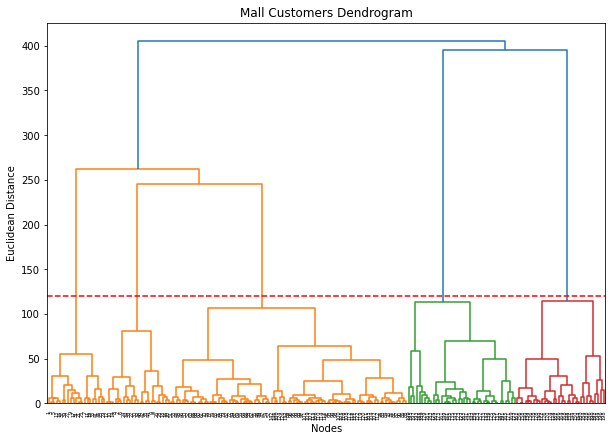

In [133]:
plt.figure(figsize=(10,7))
plt.title('Mall Customers Dendrogram')
dend = sch.dendrogram(sch.linkage(df1, method='ward'))
plt.axhline(120, linestyle='--', color='red')
plt.ylabel('Euclidean Distance')
plt.xlabel('Nodes')
plt.show()

The red horizontal line passes through 5 vertical lines resulting in 5 clusters. <br/><br/>

Note:<br/>
To draw that red horizontal line (threshold), we should start drawing it from the longest distance.